# We have data of used cars and client want to extract meaning information from it, so it can be used in his business

In [192]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [193]:
# Loading DataFrame 
df = pd.read_csv(r"C:\Users\rajen\Desktop\Shubhankar\data _to_pratice\quikr_car.csv")

### EDA

In [194]:
# Returns top 5 row of data
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [195]:
# Returns last 5 row of data
df.tail()

,name,company,year,Price,kms_driven,fuel_type
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN
891,Chevrolet Sail 1.2 LT ABS,Chevrolet,2014,"1,60,000",Petrol,NaN


In [196]:
# Gives number of rows and columns
df.shape

(892, 6)

In [197]:
# Returns number of rows times (*) number of columns
df.size

5352

In [198]:
# Returns dimension of DataFrame
df.ndim

2

In [199]:
# Returns statistical summary of numeric columns (df.describe(include="all"))
df.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [200]:
# Gives brief summary of the dataframe index and column dtypes, non-null values, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [201]:
# Looking for null values
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

### Needs Cleaning 

- Name column is inconsistent
- Year has some wrong entries
- Change Year from object to int
- Price column has some wrong entries
- Change Price from object to int
- kms_driven column has integers with kms and ','
- Change kms_driven from object to int
- fuel_type has some nan values

In [202]:
backup_df = df.copy()

In [203]:
# Check nan values for "name" column
df["name"].isna().sum()

0

In [204]:
# Taking only first three words from car name to make it consistent
df["name"] = df["name"].str.split(" ").str.slice(0,3).str.join(" ")

In [205]:
df["name"]

0         Hyundai Santro Xing
1         Mahindra Jeep CL550
2          Maruti Suzuki Alto
3           Hyundai Grand i10
4      Ford EcoSport Titanium
                ...          
887                        Ta
888              Tata Zest XM
889        Mahindra Quanto C8
890           Honda Amaze 1.2
891        Chevrolet Sail 1.2
Name: name, Length: 892, dtype: object

In [206]:
# Check nan values for "year" column
df["year"].isna().sum()

0

In [207]:
# Fetching all numeric values of year
df = df[df["year"].str.isnumeric()]

In [208]:
# Chaning data type of year from object to int
df["year"] = df["year"].astype(int)

In [212]:
# Looking for any Maruti model anfter 2000 
df[ (df["company"]=="Maruti") & (df["year"]> 2000)]

,name,company,year,Price,kms_driven,fuel_type
2,Maruti Suzuki Alto,Maruti,2018,Ask For Price,"22,000 kms",Petrol
9,Maruti Suzuki Alto,Maruti,2015,"2,50,000","60,000 kms",Petrol
11,Maruti Suzuki Stingray,Maruti,2015,"3,15,000","30,000 kms",Petrol
19,Maruti Suzuki Alto,Maruti,2014,"1,60,000","35,550 kms",Petrol
22,Maruti Suzuki Alto,Maruti,2015,"75,000","39,000 kms",Petrol
...,...,...,...,...,...,...
876,Maruti Suzuki Dzire,Maruti,2016,"4,50,000","2,500 kms",Diesel
879,Maruti Suzuki Alto,Maruti,2005,"95,000","65,000 kms",Petrol
880,Maruti Suzuki Swift,Maruti,2009,"2,50,000","51,000 kms",Diesel
882,Maruti Suzuki Alto,Maruti,2015,Ask For Price,"70,000 kms",Petrol


In [214]:
# Looking for any Hindustan model anfter 2000 
df[ (df["company"]=="Hindustan") & (df["year"]> 2000)]

,name,company,year,Price,kms_driven,fuel_type
514,Hindustan Motors Ambassador,Hindustan,2002,"90,000","25,000 kms",Diesel


Maruti has being in market for more than two decades


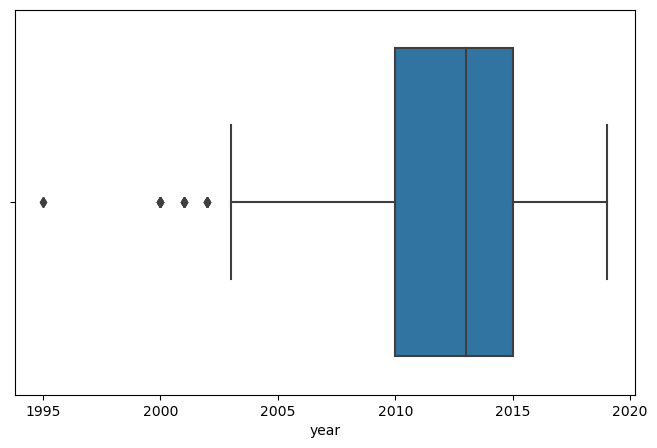

In [215]:
# Lets check outlier for years
plt.figure(figsize=(8,5))
sns.boxplot(data=df,
           x="year")
plt.show()

In [216]:
df.shape

(842, 6)

In [217]:
# lets define Q1 and Q2
Q1 = df["year"].quantile(0.25)
Q3 = df["year"].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Keeping only those year that are not outlier
df = df[(df['year'] >= lower_bound) & (df['year'] <= upper_bound)]
df


,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
886,Toyota Corolla Altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
888,Tata Zest XM,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2,Honda,2014,"1,80,000",Petrol,NaN


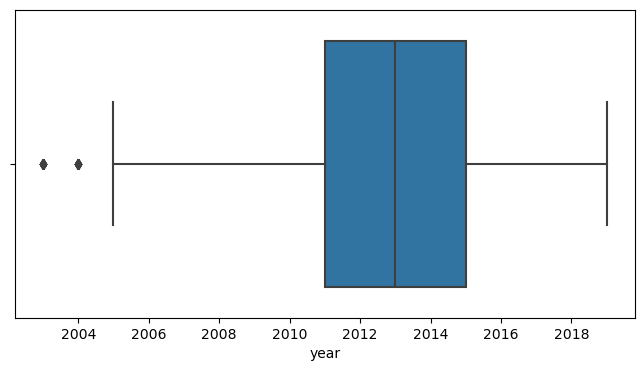

In [218]:
# Lets check outlier for years
plt.figure(figsize=(8,4))
sns.boxplot(data=df,
           x="year")
plt.show()

In [219]:
df.shape

(823, 6)

In [220]:
# lets define Q1 and Q2
Q1 = df["year"].quantile(0.25)
Q3 = df["year"].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Keeping only those year that are not outlier
df = df[(df['year'] >= lower_bound) & (df['year'] <= upper_bound)]
df


,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
886,Toyota Corolla Altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
888,Tata Zest XM,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2,Honda,2014,"1,80,000",Petrol,NaN


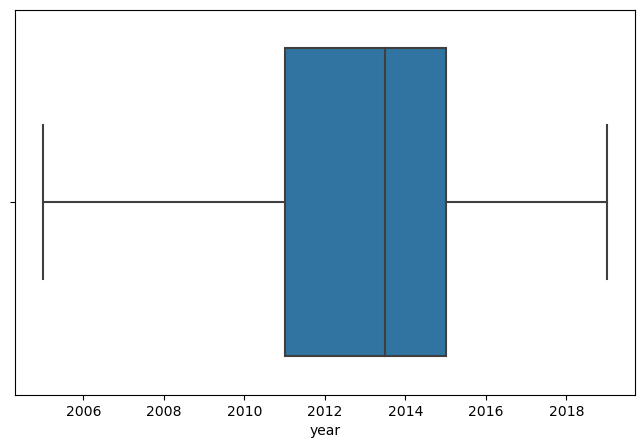

In [221]:
# Lets check outlier for years
plt.figure(figsize=(8,5))
sns.boxplot(data=df,
           x="year")
plt.show()

In [222]:
df.shape

(798, 6)

In [223]:
# Check nan values for "Price" column
df["Price"].isna().sum()

0

In [224]:
# Fetching all numeric values of Price
df = df[df["Price"] != "Ask For Price"]

In [225]:
# Chaning data type of Price from object to int 
df["Price"] = df["Price"].str.replace(",", "").astype(int)

In [226]:
df["Price"]

0       80000
1      425000
3      325000
4      575000
6      175000
        ...  
886    300000
888    260000
889    390000
890    180000
891    160000
Name: Price, Length: 776, dtype: int32

In [227]:
# Check nan values for "kms_driven" column
df["kms_driven"].isna().sum()

0

In [228]:
# Fetching all numeric values of kms_driven
df["kms_driven"] = df["kms_driven"].str.split(" ").str.get(0)
df["kms_driven"] = df["kms_driven"].str.replace(",", "")

In [229]:
# Removing wrong entries of Petrol
df = df[df["kms_driven"].str.isnumeric()]

In [230]:
# Chaning data type of kms_driven from object to int
df["kms_driven"] = df["kms_driven"].astype(int)

In [231]:
df.kms_driven.isnull().sum()

0

We don't need to check outlier for Kilometers driven as its subjective to previous onwer

In [233]:
# Check nan values for "fuel_type" column
df["fuel_type"].isna().sum()

1

In [234]:
df = df[df["fuel_type"].isna() == False]

In [235]:
df["fuel_type"]

0      Petrol
1      Diesel
3      Petrol
4      Diesel
6      Diesel
        ...  
883    Petrol
885    Diesel
886    Petrol
888    Diesel
889    Diesel
Name: fuel_type, Length: 773, dtype: object

In [236]:
df.fuel_type.isnull().sum()

0

In [237]:
df.describe()

,year,Price,kms_driven
count,773.000000,7.730000e+02,773.000000
mean,2013.020699,4.282776e+05,45117.759379
std,3.219852,4.819186e+05,33815.111389
min,2005.000000,3.200000e+04,0.000000
25%,2011.000000,1.897000e+05,25000.000000
50%,2013.000000,3.200000e+05,40000.000000
75%,2015.000000,5.000000e+05,55000.000000
max,2019.000000,8.500003e+06,400000.000000


Here we can see that max price value is much more than rest of 75% of data

In [238]:
print(df[df["Price"] > 4000000])
print("----"* 25)
print(df[df["Price"] > 5000000])
print("----"* 25)
print(df[df["Price"] > 6000000])

                   name   company  year    Price  kms_driven fuel_type
562  Mahindra XUV500 W6  Mahindra  2014  8500003       45000    Diesel
----------------------------------------------------------------------------------------------------
                   name   company  year    Price  kms_driven fuel_type
562  Mahindra XUV500 W6  Mahindra  2014  8500003       45000    Diesel
----------------------------------------------------------------------------------------------------
                   name   company  year    Price  kms_driven fuel_type
562  Mahindra XUV500 W6  Mahindra  2014  8500003       45000    Diesel


In [239]:
df = df[df["Price"] < 6000000].reset_index(drop=True)

In [240]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
767,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
768,Tata Indica V2,Tata,2009,110000,30000,Diesel
769,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
770,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [95]:
# Saving clean data
df.to_csv("Cleaned_cars_data.csv", index=False)

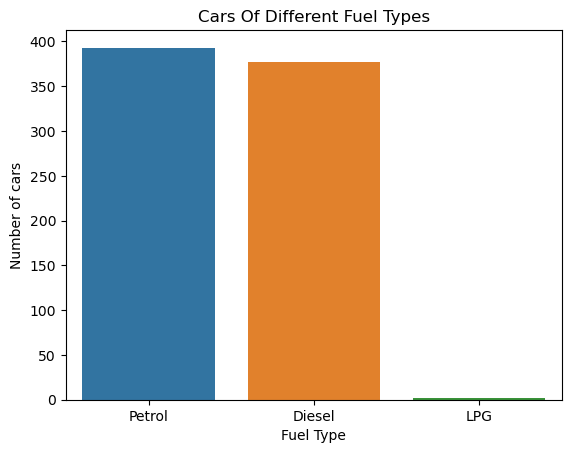

In [241]:
# Seeing cars belonging to different fuel type
sns.countplot(data = df, x="fuel_type")
plt.xlabel("Fuel Type")
plt.ylabel("Number of cars")
plt.title("Cars Of Different Fuel Types")
plt.show()

In [242]:
df["fuel_type"].value_counts()

Petrol    393
Diesel    377
LPG         2
Name: fuel_type, dtype: int64

- 392 cars belong to petrol fuel type that is 50.77%
- 377 cars belong to diesel type that is 48.83%
- 2 cars belong to LPG type that is 0.25%

In [243]:
df["year"].value_counts()

2015    111
2013     94
2014     91
2012     75
2016     74
2011     59
2009     54
2017     53
2010     43
2018     30
2006     22
2007     19
2019     18
2008     16
2005     13
Name: year, dtype: int64

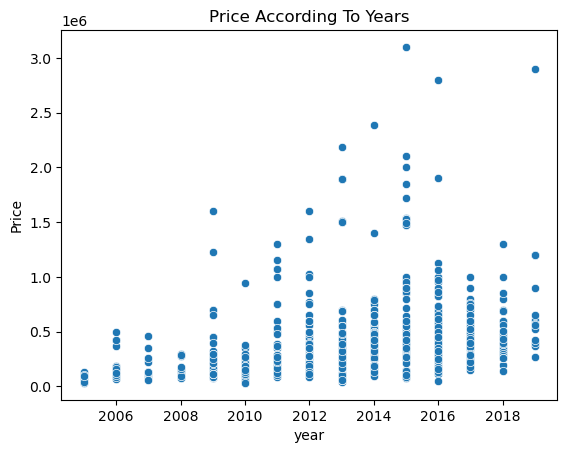

In [244]:
# Checking relationship between year and price
sns.scatterplot(data = df, 
               x="year",
               y="Price")
plt.title("Price According To Years")
plt.show()

- In 2015 car sell  was highest around 14%
- There was increase of 2.2% in sales compare to previous high sale year 2013

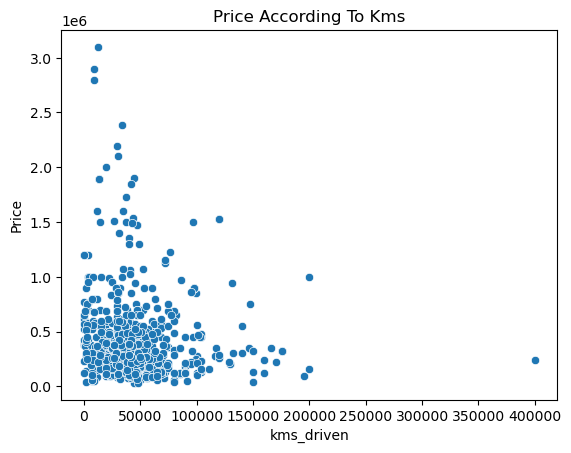

In [245]:
# Checking relationship between KM and price
sns.scatterplot(data = df, 
               x="kms_driven",
               y="Price")
plt.title("Price According To Kms")
plt.show()

We can conclude that less the kms_driven higher the price of car

In [246]:
df["company"].value_counts()

Maruti        199
Hyundai       132
Mahindra       93
Tata           64
Honda          59
Chevrolet      34
Toyota         34
Renault        33
Ford           28
Volkswagen     19
Skoda          13
Audi           11
Mini            8
BMW             8
Datsun          7
Mitsubishi      6
Nissan          6
Mercedes        5
Fiat            4
Force           4
Jaguar          2
Land            1
Jeep            1
Volvo           1
Name: company, dtype: int64

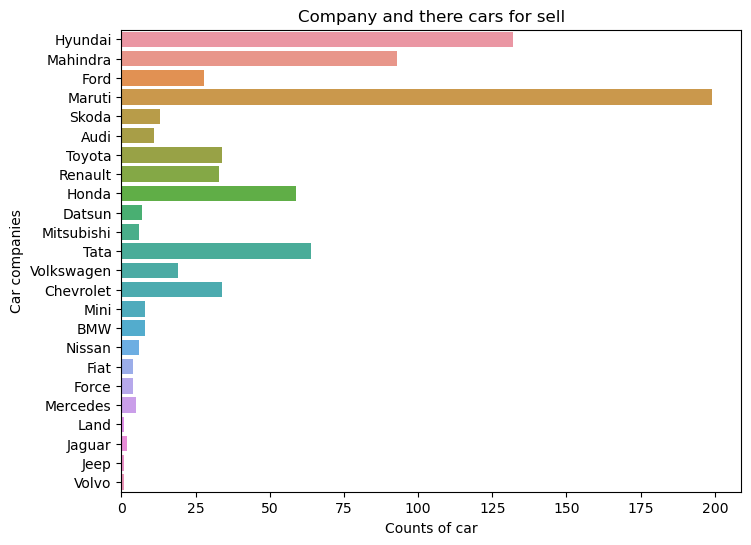

In [247]:
# lets see which company has more cars for sell
plt.figure(figsize=(8,6))
sns.countplot(data=df,
             y = "company")
plt.xlabel("Counts of car")
plt.ylabel("Car companies")
plt.title("Company and there cars for sell")
plt.show()

### Conclusion
- There are total 772 cars for sell on the website.
- There are 392 cars belong to petrol fuel type which contributes to 50.77% of the all cars in the dataset.
- 377 cars belong to diesel type which contributes to 48.83% of the all cars in the dataset.
- 2 cars belong to LPG type which contributes to 0.25% of the all cars in the dataset.
- In 2015 car sell was highest.
- The cars which are driven less (has less KM) have generaly high price.
- Top three companies are Maruti(199)which is around 25.77%, Hyundai(132) which is around 17.09%, Mahindra(93) which is around 12.04%.
- Maruti has being in market for more than two decades from 1995 to 2018.